# Car Price Prediction

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import bokeh as bk

In [2]:
from bokeh.io import output_notebook, show
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [3]:
# Inline matplotlib (keep charts in this notebook)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# This was a warning on the KDE plot for 2D topo mappings

In [4]:
import os
os.getcwd()

'C:\\Users\\Max_m\\Documents\\Python For Data Science Handbook\\Blossom Academy'

# Load Data

In [5]:
# upload data from csv
car = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [6]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# EDA & Cleaning


In [7]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
car.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [9]:
car.describe()
#selling price is in Indian Rupees ($ = ~ 75 rupees)

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
# 1km driven seemed low for a used car, so lets sort the table so we can see more info on that car
car.sort_values(by = 'km_driven')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1312,Mahindra Quanto C6,2014,250000,1,Diesel,Individual,Manual,Second Owner
1715,Ford Figo Titanium,2020,635000,101,Petrol,Dealer,Manual,Test Drive Car
1714,Ford Freestyle Titanium Diesel,2020,784000,101,Diesel,Dealer,Manual,Test Drive Car
1716,Ford Ecosport 1.5 Diesel Titanium,2020,1000000,101,Diesel,Dealer,Manual,Test Drive Car
1291,Maruti Alto 800 VXI,2020,350000,1000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
2394,Toyota Innova 2.5 V Diesel 8-seater,2009,350000,350000,Diesel,Individual,Manual,First Owner
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner


In [11]:
# 1km seems too low for a used car from 2014 with at least 2 owners, so this may be an outlier
# to be safe, lets delete this row from the dataframe, since it may be incorrect

car.drop([1312], inplace = True)
car.shape

#check the shape to make sure the row was deleted, now there is 4339 rows instead of 4340

(4339, 8)

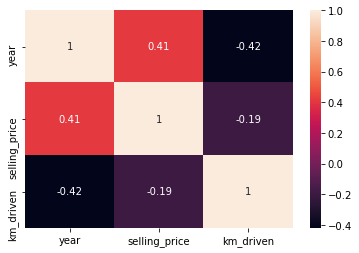

In [12]:
sns.heatmap(car.corr(), annot= True);

# Feature Engineering

In [13]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [14]:
car['name'].value_counts()

Maruti Swift Dzire VDI              69
Maruti Alto 800 LXI                 59
Maruti Alto LXi                     47
Maruti Alto LX                      35
Hyundai EON Era Plus                35
                                    ..
Maruti S-Cross Sigma DDiS 200 SH     1
Tata Nano CX                         1
Nissan Terrano XE 85 PS              1
Skoda Laura Ambiente 1.9 PD          1
Nissan Kicks XL D BSIV               1
Name: name, Length: 1491, dtype: int64

In [15]:
#see different items in each column
for x in car.columns:
    print('\n', x, '-------\n', car[x].value_counts())


 name -------
 Maruti Swift Dzire VDI              69
Maruti Alto 800 LXI                 59
Maruti Alto LXi                     47
Maruti Alto LX                      35
Hyundai EON Era Plus                35
                                    ..
Maruti S-Cross Sigma DDiS 200 SH     1
Tata Nano CX                         1
Nissan Terrano XE 85 PS              1
Skoda Laura Ambiente 1.9 PD          1
Nissan Kicks XL D BSIV               1
Name: name, Length: 1491, dtype: int64

 year -------
 2017    466
2015    421
2012    415
2013    386
2018    366
2014    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

 selling_price -------
 300000     162
250000     124
350000     122
550000     107
600000     103
          ... 
1331000      1
479000       1
129000

In [16]:
#car name has lots of different options, might be too specific/not be a good indicator
#we can narrow to brand name
car.name.unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [17]:
brand_name = []
for x in car.name:
    y = x.split(' ')
    brand_name.append(y[0])

brand_name[:10]

['Maruti',
 'Maruti',
 'Hyundai',
 'Datsun',
 'Honda',
 'Maruti',
 'Hyundai',
 'Tata',
 'Hyundai',
 'Maruti']

In [18]:
#we can drop the previous column that had the full name
car = car.drop(['name'], axis = 1)

#and add the new column that just has the brand name
car['brand_name'] = brand_name

In [19]:
car.brand_name.value_counts()

Maruti           1280
Hyundai           821
Mahindra          364
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Datsun             37
Fiat               37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Volvo               4
Ambassador          4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Kia                 1
Daewoo              1
Force               1
Name: brand_name, dtype: int64

In [20]:
#dummify columns so that they are binary
car_dummies = pd.get_dummies(car, drop_first = True)

In [21]:
car_dummies.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_name_Mercedes-Benz,brand_name_Mitsubishi,brand_name_Nissan,brand_name_OpelCorsa,brand_name_Renault,brand_name_Skoda,brand_name_Tata,brand_name_Toyota,brand_name_Volkswagen,brand_name_Volvo
0,2007,60000,70000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
car_dummies.shape
#rows, columns

(4339, 42)

# Modeling


predicting sale price from other info given


# Set up variables for modeling

In [23]:
#split predictors and target variable

X = car_dummies.copy()
y = X.pop('selling_price')

In [24]:
#split train & test groups

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [25]:
#standardize X values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Linear Regression

In [26]:
#linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# get cross validated scores
scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
print()
#training score
print("Training Score:", lr_model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", lr_model.score(X_test, y_test))

Cross-validated training scores: [ 6.51669983e-01  6.89275358e-01  6.51498597e-01 -6.47439505e+09
 -1.91853312e+20]
Mean cross-validated training score: -3.837066239673393e+19

Training Score: 0.6919904186306544
Test Score: -1.3895219855511289e+21


In [27]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(lr_model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients to gauge influence (show importance of predictor variables)
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by = 'coef_abs', ascending = False)[:10]

,coefficients,coef_abs
fuel_Electric,-7.677646e+17,7.677646e+17
brand_name_Force,-5.648568e+12,5.648568e+12
brand_name_BMW,1.834679e+05,1.834679e+05
year,1.617192e+05,1.617192e+05
brand_name_Mercedes-Benz,1.456791e+05,1.456791e+05
brand_name_Audi,1.272844e+05,1.272844e+05
transmission_Manual,-1.057242e+05,1.057242e+05
fuel_Diesel,9.951477e+04,9.951477e+04
brand_name_Land,9.375752e+04,9.375752e+04
brand_name_Toyota,7.717645e+04,7.717645e+04


Text(0, 0.5, 'Feature')

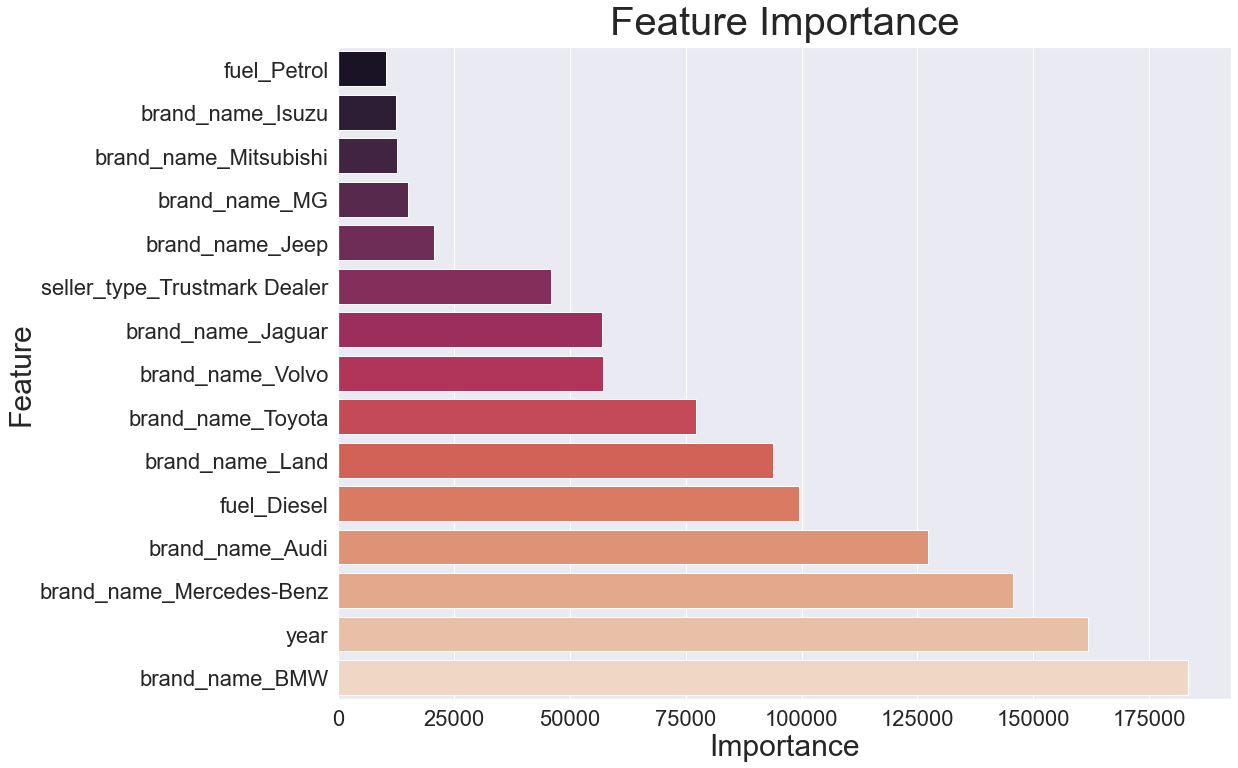

In [28]:
import matplotlib.pyplot as plt
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lr_model.coef_
    })

fi.sort_values('importance', ascending=True, inplace=True)

#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

# Ridge CV

In [29]:
from sklearn.linear_model import RidgeCV
import numpy as np

# create a RidgeCV model instance
ridge_model = RidgeCV(alphas=np.logspace(-10, 10, 30), cv=5)
# fit the model
ridge_model.fit(X_train, y_train)

#mean cv score on training data
scores = cross_val_score(ridge_model, X_train, y_train, cv=5)

print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
print()
#training score
print("Training Score:", ridge_model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", ridge_model.score(X_test, y_test))

Cross-validated training scores: [0.72415833 0.68929104 0.65078851 0.55522791 0.72543823]
Mean cross-validated training score: 0.6689808056576382

Training Score: 0.6919911087490448
Test Score: 0.6707754688306777


In [30]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(ridge_model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients to gauge influence (show importance of predictor variables)
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by = 'coef_abs', ascending = False)[:10]

,coefficients,coef_abs
brand_name_BMW,183323.394291,183323.394291
year,161701.996816,161701.996816
brand_name_Mercedes-Benz,145649.441556,145649.441556
brand_name_Audi,127099.702853,127099.702853
transmission_Manual,-105902.097604,105902.097604
fuel_Diesel,98406.233851,98406.233851
brand_name_Land,93640.281768,93640.281768
brand_name_Toyota,76853.591011,76853.591011
brand_name_Volvo,57024.330077,57024.330077
brand_name_Jaguar,56919.691866,56919.691866


Text(0, 0.5, 'Feature')

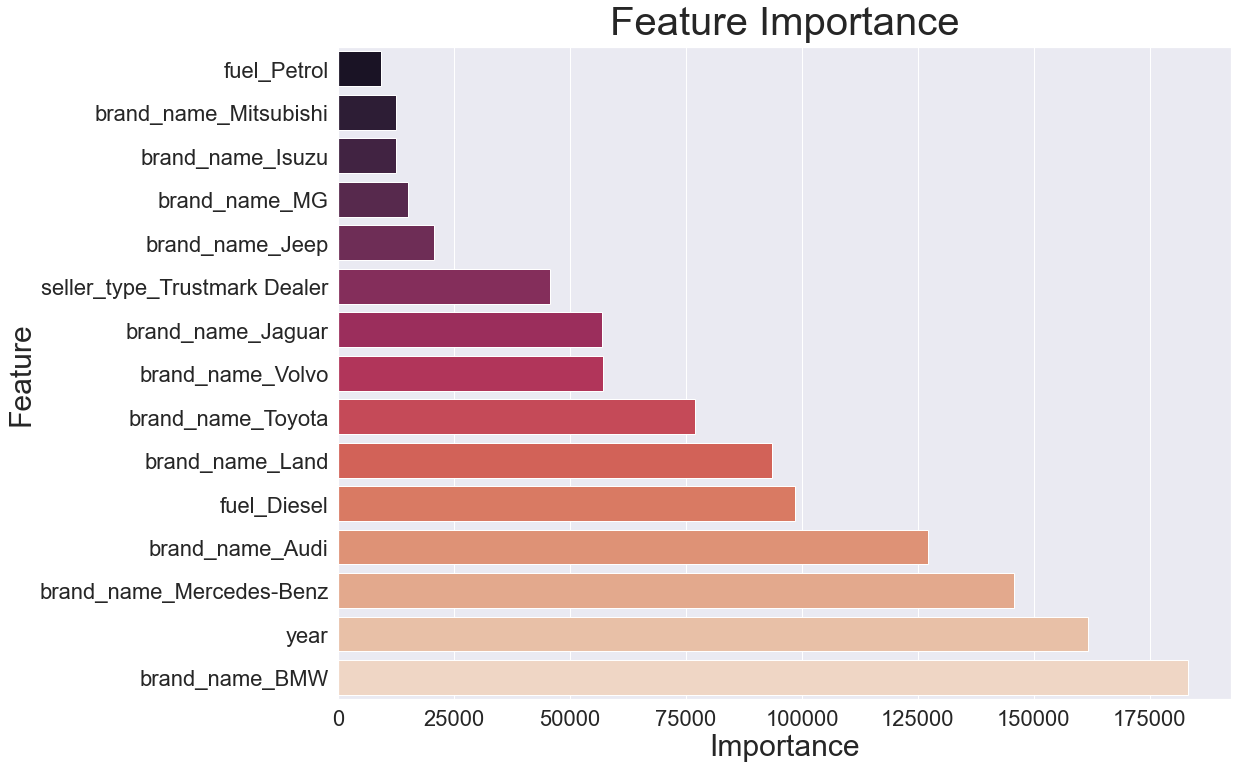

In [31]:
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': ridge_model.coef_
})

fi.sort_values('importance', ascending=True, inplace=True)

#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

# Lasso CV

In [32]:
from sklearn.linear_model import LassoCV

# create a LassoCV model instance
lasso_model = LassoCV(eps= [.0001, .001, .01, .1], alphas=np.logspace(-8, 8, 20), max_iter = 1000000, cv=5)
# fit the model
lasso_model.fit(X_train, y_train)

# evaluate on the training set
training_score = lasso_model.score(X_train, y_train)
# evaluate on the test set
test_score = lasso_model.score(X_test, y_test)

#mean cv score on training data
scores = cross_val_score(lasso_model, X_train, y_train, cv=5)


print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
print()
#training score
print("Training Score:", lasso_model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", lasso_model.score(X_test, y_test))

Cross-validated training scores: [0.72496166 0.68929104 0.6514986  0.55421666 0.72612713]
Mean cross-validated training score: 0.669219017826106

Training Score: 0.6919911087490448
Test Score: 0.6707754688143877


In [33]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(lasso_model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients to gauge influence (show importance of predictor variables)
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by = 'coef_abs', ascending = False)[:10]

,coefficients,coef_abs
brand_name_BMW,183323.393803,183323.393803
year,161701.996926,161701.996926
brand_name_Mercedes-Benz,145649.441101,145649.441101
brand_name_Audi,127099.702230,127099.702230
transmission_Manual,-105902.097547,105902.097547
fuel_Diesel,98406.235141,98406.235141
brand_name_Land,93640.281587,93640.281587
brand_name_Toyota,76853.589697,76853.589697
brand_name_Volvo,57024.329878,57024.329878
brand_name_Jaguar,56919.691618,56919.691618


Text(0, 0.5, 'Feature')

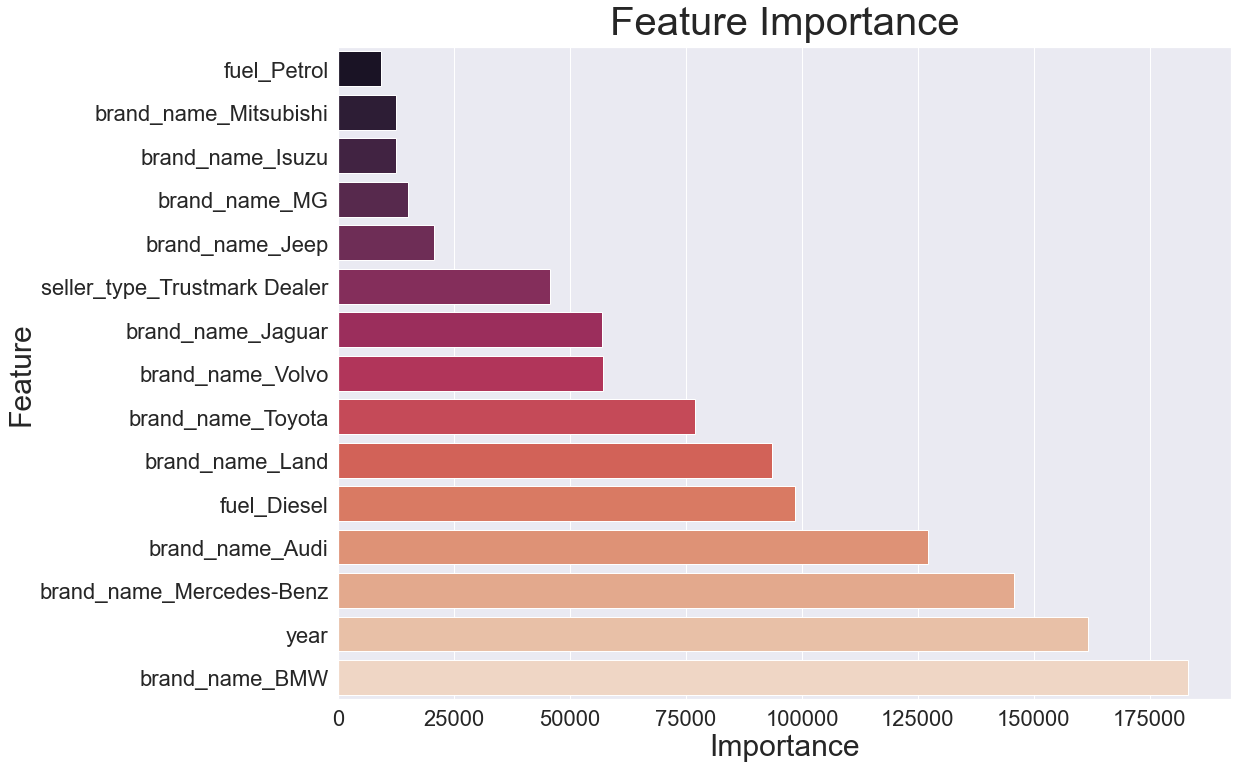

In [34]:
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lasso_model.coef_
})

fi.sort_values('importance', ascending=True, inplace=True)

#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

# Elastic Net CV


In [35]:
#Elastic net model with scores
from sklearn.linear_model import ElasticNetCV

enet_model = ElasticNetCV(alphas=np.logspace(-4, 4, 10), 
                     l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                     max_iter = 100000,
                     cv=5)
# fit the model
enet_model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', enet_model.alpha_)
# get the best l1-ratio
print('Best l1-ratio:', enet_model.l1_ratio_)

# evaluate on the training set
training_score = enet_model.score(X_train, y_train)
# evaluate on the test set
test_score = enet_model.score(X_test, y_test)

#mean cv score on training data
scores = cross_val_score(enet_model, X_train, y_train, cv=5)

print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
print()
#training score
print("Training Score:", enet_model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", enet_model.score(X_test, y_test))

Best alpha: 0.0001
Best l1-ratio: 0.99
Cross-validated training scores: [0.72496158 0.68929107 0.65059106 0.55506583 0.72492878]
Mean cross-validated training score: 0.6689676615209091

Training Score: 0.6919911087473043
Test Score: 0.670775505298634


In [36]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(enet_model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients to gauge influence (show importance of predictor variables)
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by = 'coef_abs', ascending = False)[:10]

,coefficients,coef_abs
brand_name_BMW,183324.487282,183324.487282
year,161701.754032,161701.754032
brand_name_Mercedes-Benz,145650.462027,145650.462027
brand_name_Audi,127101.100338,127101.100338
transmission_Manual,-105902.223615,105902.223615
fuel_Diesel,98403.377734,98403.377734
brand_name_Land,93640.687910,93640.687910
brand_name_Toyota,76856.532249,76856.532249
brand_name_Volvo,57024.775598,57024.775598
brand_name_Jaguar,56920.247194,56920.247194


Text(0, 0.5, 'Feature')

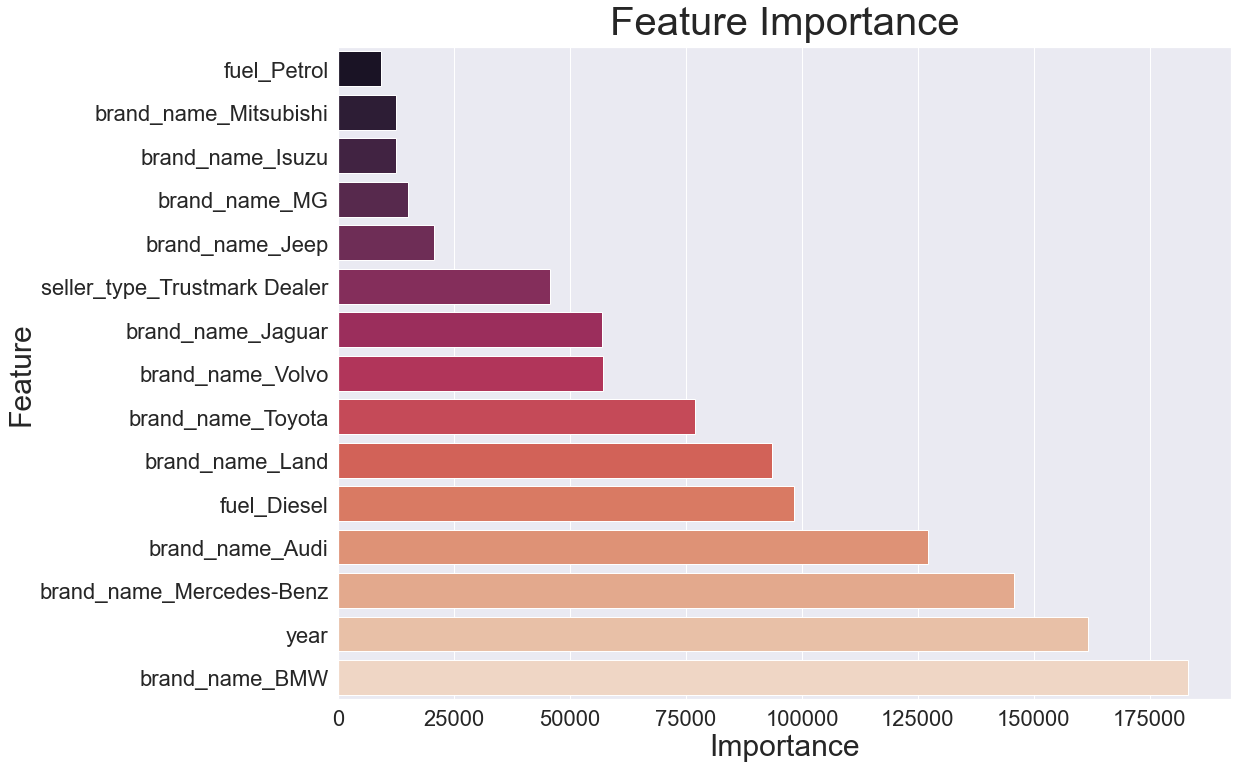

In [37]:
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': enet_model.coef_
})

fi.sort_values('importance', ascending=True, inplace=True)

#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

# Best model = Lasso CV

In [38]:
predictions = lasso_model.predict(X_test)
residuals_df = pd.DataFrame(predictions, y_test)
residuals_df.reset_index(inplace = True)
residuals_df.rename({'selling_price': 'actual', 0: 'predictions'}, axis = 1, inplace = True)
residuals_df['residuals'] = residuals_df.actual - residuals_df.predictions
residuals_df

,actual,predictions,residuals
0,115999,55510.194868,60488.805132
1,750000,427194.199246,322805.800754
2,390000,436758.193652,-46758.193652
3,239000,322401.623115,-83401.623115
4,800000,267262.002402,532737.997598
...,...,...,...
1297,550000,554166.889913,-4166.889913
1298,670000,760092.945630,-90092.945630
1299,500000,572353.443064,-72353.443064
1300,650000,388931.741927,261068.258073


Text(0, 0.5, 'Actual')

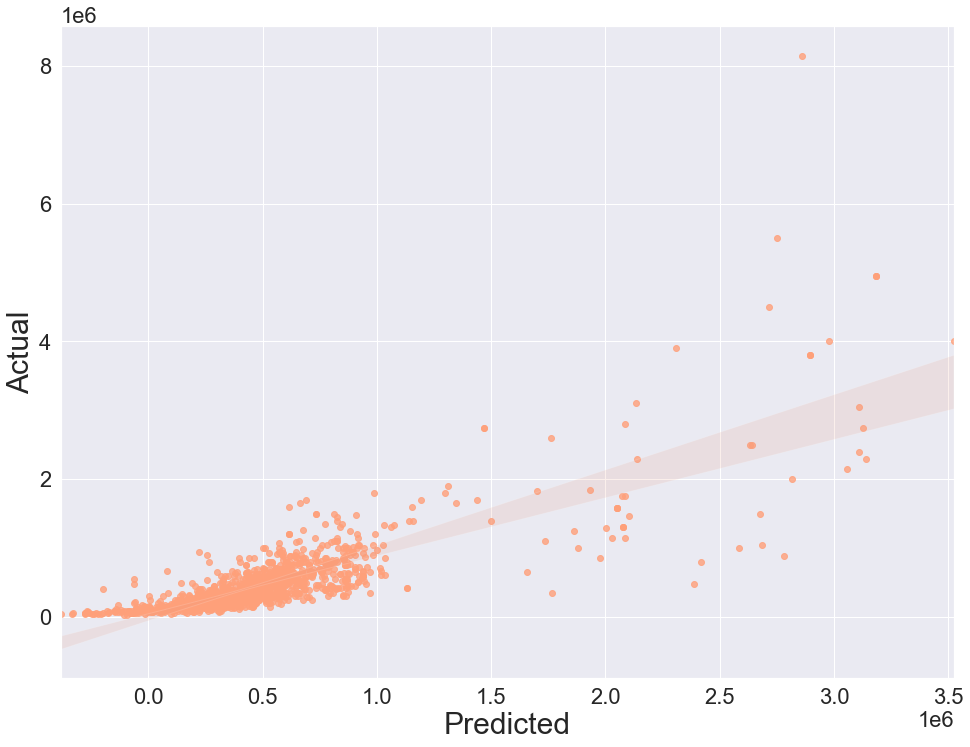

In [39]:
#predicted y values
predictions = lasso_model.predict(X_test)

#residuals (or error between predictions and actual)
residuals = y_test - predictions

sns.axes_style(style='white')

sns.set(font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
ax = sns.regplot(x="predictions", y="actual", data= residuals_df,  scatter_kws = {'color': 'lightsalmon'}, 
                 line_kws = {'color': 'darksalmon'})
ax.set_xlabel('Predicted', fontsize = 30)
ax.set_ylabel('Actual', fontsize = 30)

In [40]:
from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test, predictions))**0.5
#predictions are acurate within about 277,100 rupees which is about $3700

327518.584190645